# Predict rocket launch with machine learning

Let’s use artificial intelligence and machine learning to discover weather patterns on days when rocket launches did successfully happen!

## Collect data



The first step in any data science or machine learning solution is to collect and understand the data. We collected publicly available data from [NOAA](https://www.noaa.gov/) and [Weather Underground](https://www.wunderground.com/history) for the dates of NASA rocket launches taken from the [list of NASA missions Wikipedia page](https://wikipedia.org/wiki/List_of_NASA_missions). 

### Import libraries

We can now import the libraries. They'll help us import and clean the weather data, and create and test the machine learning model.

In [1]:
# Pandas library is used for handling tabular data
import pandas as pd
# NumPy is used for handling numerical series operations (addition, multiplication, and ...)
import numpy as np

# Sklearn's preprocessing library is used for processing and cleaning the data 
from sklearn import preprocessing

### Read data into a variable

Now that we have all of the libraries imported, we can use the pandas library to import our data. Use the command <code>pd.read_excel</code> to read the data and save it in a variable. Then, use the <code>.head() </code>function to print out the first five rows of the data. This will ensure that we have read everything correctly.

In [2]:
launch_data = pd.read_excel('RocketLaunchDataCompleted.xlsx')
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,1958-12-04,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26:00,Cloudy,NaN
1,NaN,1958-12-05,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26:00,Cloudy,NaN
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25:00,Cloudy,NaN
3,NaN,1958-12-07,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,...,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25:00,Partly Cloudy,NaN
4,NaN,1958-12-08,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,...,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24:00,Partly Cloudy,NaN


### Exploring data
We can use the <code>.columns</code> function call to view all of the columns in our data. This will show us the attributes that the data has. You'll see some common attributes like names of past rockets that were scheduled to launch, the dates they were scheduled, if they actually launched, and many more. Look at these columns and try to guess which ones will have the greatest impact on determining if a rocket will launch.

In [3]:
launch_data.columns

Index(['Name', 'Date', 'Time (East Coast)', 'Location', 'Crewed or Uncrewed',
       'Launched?', 'High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp',
       'Percipitation at Launch Time', 'Hist Ave Percipitation',
       'Wind Direction', 'Max Wind Speed', 'Visibility',
       'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
       'Hist Ave Visibility', 'Sea Level Pressure',
       'Hist Ave Sea Level Pressure', 'Day Length', 'Condition', 'Notes'],
      dtype='object')

### Data cleaning
Now that we have the data imported, we need to apply a machine learning practice known as "cleaning the data." This means taking data that looks incorrect or messy and cleaning it up by changing the value or deleting it altogether. Common examples of cleaning data are ensuring that there are no null values and making every value in a column look the same. Let's get an overview of the launch data.

In [4]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          60 non-null     object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             59 non-null     object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            60 non-null     object        
 5   Launched?                     60 non-null     object        
 6   High Temp                     299 non-null    float64       
 7   Low Temp                      299 non-null    float64       
 8   Ave Temp                      299 non-null    float64       
 9   Temp at Launch Time           59 non-null     float64       
 10  Hist High Temp                299 non-null    float64       
 11  Hist Low Temp                 29

In [5]:
# count the number of nan values in each column
launch_data.isnull().sum()

Name                            240
Date                              0
Time (East Coast)               241
Location                          0
Crewed or Uncrewed              240
Launched?                       240
High Temp                         1
Low Temp                          1
Ave Temp                          1
Temp at Launch Time             241
Hist High Temp                    1
Hist Low Temp                     1
Hist Ave Temp                     1
Percipitation at Launch Time      1
Hist Ave Percipitation            1
Wind Direction                    1
Max Wind Speed                    1
Visibility                        1
Wind Speed at Launch Time       241
Hist Ave Max Wind Speed         300
Hist Ave Visibility             300
Sea Level Pressure                1
Hist Ave Sea Level Pressure     300
Day Length                        2
Condition                         2
Notes                           297
dtype: int64

We can see that <strong>Hist Ave Max Wind Speed</strong>, <strong>Hist Ave Visibility</strong>, and <strong>Hist Ave Sea Level Pressure</strong> have no data.

It makes sense that <strong>Wind Speed at Launch Time</strong>, <strong>Temp at Launch Time</strong>, <strong>Launched</strong>, <strong>Crewed or Uncrewed</strong>, <strong>Time</strong>, and <strong>Name</strong> have only 60 values, because the data includes only 60 launches. The rest are the days before and after the launch.

Some ways to clean the data:
* The rows that don't have <code>Y</code> in the <code>Launched</code> column did not have a rocket launch, so make those missing values <code>N</code>.
* For rows missing information on whether the rocket was crewed or uncrewed, assume uncrewed. Uncrewed is more likely because there were fewer crewed missions.
* For missing wind direction, mark it as <code>unknown</code>.
* For missing condition data, assume it was a typical day and use <code>fair</code>.
* For any other data, use a value of <code>0</code>.


In [6]:
## To handle missing values, we will fill the missing values with appropriate values 
launch_data['Launched?'].fillna('N', inplace=True)
launch_data['Crewed or Uncrewed'].fillna('Uncrewed', inplace=True)
launch_data['Wind Direction'].fillna('unknown', inplace=True)
launch_data['Condition'].fillna('Fair', inplace=True)
launch_data.fillna(0, inplace=True)
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,Uncrewed,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,Cloudy,0
1,0,1958-12-05,0,Cape Canaveral,Uncrewed,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,Cloudy,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,Cloudy,0
3,0,1958-12-07,0,Cape Canaveral,Uncrewed,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,Partly Cloudy,0
4,0,1958-12-08,0,Cape Canaveral,Uncrewed,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,Partly Cloudy,0


---
**NOTE**

We are changing the data that's stored in the <code>launch_data</code> variable, not the data saved in the Excel file. If we find that you modified or removed any data that we didn't mean to, we can re-run the notebook to bring the original data back in.

---

### Data manipulation

When doing machine learning, models are best suited for numerical inputs, so let's convert all text into numbers. As an example, we'll use <code>1</code> if a rocket is crewed and <code>0</code> if a rocket is uncrewed.

In [7]:
## As part of the data cleaning process, we have to convert text data to numerical because computers understand only numbers
label_encoder = preprocessing.LabelEncoder()

# Three columns have categorical text info, and we convert them to numbers
launch_data['Crewed or Uncrewed'] = label_encoder.fit_transform(launch_data['Crewed or Uncrewed'])
launch_data['Wind Direction'] = label_encoder.fit_transform(launch_data['Wind Direction'])
launch_data['Condition'] = label_encoder.fit_transform(launch_data['Condition'])

In [8]:
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,1,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,0,0
1,0,1958-12-05,0,Cape Canaveral,1,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,0,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,1,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,0,0
3,0,1958-12-07,0,Cape Canaveral,1,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,6,0
4,0,1958-12-08,0,Cape Canaveral,1,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,6,0


The choices that we made in this module were simplistic at best. Although a rocket didn't launch the day before or after it doesn't mean that a rocket launch would have been pushed due to weather on those days. So putting <code>N</code> in the <code>Launched</code> column for those dates is not really accurate.

Here are some ways to continue your learning and data journey:

* Explore the data further: Look up articles and reports on each launch. Were there considerations made regarding weather before launch? Were there weather conditions around these dates that might have been worrisome?
* Explore the missing weather data: What about the dates that NASA didn't choose to launch rockets? Beyond individual days, were there seasons that NASA avoided? What kind of weather profile do those seasons tend to have?
* Explore the missing launch data: Can you find data on launches that were pushed due to weather? Is there data from other countries on their launches that you might be able to incorporate?
* Explore other data manipulations: Could we have used better values to fill in missing data?
* Decide what data you would want: If you had access to NASA's subject matter experts and data sources, what do you think would be most important to making a launch or push decision? If you could ask an expert something, what would it be?
* Evaluate similar problems: Are there similar problems that you can use to help fill in this data? For example, are airplane delays due to weather in the area also an indicator?

Being a data scientist isn't about having a complete data set and applying an algorithm to it. It's about starting from a place that's messy and likely wrong and learning in an iterative fashion.

## Build a machine learning model

Previously, we imported 300 rows of weather data representing 60 rocket launches plus the couple of days before and after a launch. Through a simplistic version of data cleaning and manipulation, we got data to a place where we can start using machine learning algorithms to it.

### Determine columns to include in a machine learning model

To begin training our machine learning model, we'll start by teaching the computer what parts of the data to look at to make predictions. We know that the column 
we want the model to predict is the "Launched" column. We'll extract this column and store it in a variable as a list of <code>Y</code> and <code>N</code>. 

Also  we'll remove some of the columns that aren't needed for making this prediction. Columns like "Name" give us more context about the data. But the name of a launch isn't an indicator of whether weather will cause the launch to be postponed. We'll focus on the columns for wind speed, conditions, and precipitation.

In [9]:
# First, we save the output we are interested in. In this case, "launch" yes and no's go into the output variable.
y = launch_data['Launched?']

# Removing the columns we are not interested in and saving the rest of the data as input data
X = launch_data.drop(['Name','Date','Time (East Coast)','Location','Launched?','Hist Ave Sea Level Pressure','Sea Level Pressure','Day Length','Notes','Hist Ave Visibility', 'Hist Ave Max Wind Speed'], axis=1)

Now we have two variables. The output is in <code>y</code>, and the input is in <code>X</code>. We can see an overview of the input data by looking at the columns in the newly created <code>X</code> variable, The <code>X</code> input data represents the weather for a particular day. In this case, we aren't worried about the date or time. We want the profile of the weather for that day to be the indicator for whether a launch should happen, not the date or time

In [10]:
# List of variables that our machine learning algorithm is going to look at:
X.columns

Index(['Crewed or Uncrewed', 'High Temp', 'Low Temp', 'Ave Temp',
       'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp',
       'Hist Ave Temp', 'Percipitation at Launch Time',
       'Hist Ave Percipitation', 'Wind Direction', 'Max Wind Speed',
       'Visibility', 'Wind Speed at Launch Time', 'Condition'],
      dtype='object')

## Choose the machine learning algorithm to predict rocket launch success

Now that we have chosen which columns we want to use to predict whether a rocket would launch given certain weather conditions. Now, we'll need to choose which algorithm to use to make our model. 
Remember the question: Can you predict whether a launch is likely to be able to happen given specific weather conditions? This question has two choices. A rocket will launch, either yes or no. This question is considered a two-class classification problem.

[![alt text][image]][hyperlink]

[image]: https://scikit-learn.org/stable/_static/ml_map.png "Choosing the right estimator"

Using scikit-learn, it's easy to create the machine learning model we need for this model, let's try with a decision tree. 
The goal of a Decision Tree is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

Some [advantages](https://scikit-learn.org/stable/modules/tree.html#tree) of decision trees are:

* Simple to understand and to interpret. Trees can be visualised.
* Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
* The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
* Able to handle both numerical and categorical data. However scikit-learn implementation does not support categorical variables for now. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.
* Able to handle multi-output problems.
*Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
* Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

The disadvantages of decision trees include:

* Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
* Predictions of decision trees are neither smooth nor continuous, but piecewise constant approximations as seen in the above figure. Therefore, they are not good at extrapolation.
* The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.
* There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

In [11]:
# Machine learning libraries used to build a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

The <code>random_state</code> parameter will be used for most machine learning algorithms. It controls the randomness of the algorithm. When you use this estimator to split the data into data to train with and data to test with, the seed provided here dictates the randomness of that split. The next unit will provide more information on data splitting.

The <code>max_depth</code> parameter is a tree-specific parameter that allows you to scope the output of the model. In this case, it isn't likely to be informative to get every possible probability of a specific weather condition and its likely effect on the likelihood of a rocket launch. The depth will be capped at five to reduce the knowledge gained to what is most practically related to the outcome.



In [12]:
# Create decision tree classifier 
tree_model = DecisionTreeClassifier(random_state=0, max_depth = 5)

### Split data into training and testing datasets


In [13]:
# Sklearn library contains all the machine learning packages we need to extract patterns from the data
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split

One way to explain the importance of splitting data is to compare it to an exam you might take. Consider a formal class you might be taking. Throughout the class, you're shown example problems and told what the answers are. 

Imagine a class where your instructor gave you the exact exam and the exam key (answers) the day before the exam. Would you ace the test? Yes!

Would you know if you had learned the concepts? No. You're more likely to have learned the answers to the questions on the test and not the concepts the exam was trying to test.

If you want to actually learn, you should practice with problems for which you have the answers. When you feel confident about those problems, try problems for which you don't already know the answers. That's basically what the classifier is doing to "learn."

By using scikit-learn and the classifier's splitting function, we can get a random sampling of <code>X</code> and <code>y</code> that match in order. If the data wasn't split randomly but instead the first 80% of the rows were taken for training data and the rest were left for testing, it would introduce problems.

For example, let's say the data is sorted in date order. If the first 240 rows were taken to train, then you would be training your model on data that predates 1999. This is an issue because the sensors might have changed over time. Only looking at older data might not be a good indicator for decisions that would be made with new technology.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

* Input data: <code>X</code> - All of the columns that we want to use to predict a launch.
* Output data: <code>y</code> - The outcome of each row (whether a rocket launched or not).
* Test size: <code>0.2</code> - Training your data on 80% and testing on 20% is a common split in data science.
* Random state: <code>42</code> - A random seed that will change the randomness of selecting the data.

## Train and test the machine learning model to predict rocket launch success

After the data is separated into the training and testing sections, we can train our machine learning model. One of the reasons Python is a popular language for data science and machine learning is because of all the libraries that exist to support the study of data. As we've seen, getting the machine learning model created and the data split was simple. Fitting and testing our model will also be simple.

### Fit the model

The next step in the data science lifecycle is to fit the model to the training data. The act of "fitting" is basically where the model is learning. To fit the model, we call <code>fit()</code> on the machine learning classifier and pass in the <code>X_train</code> and <code>y_train</code> data.

In [15]:
# Fitting the model to the training data
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

### Test the model

Testing the model is like taking the exam. We'll provide <code>X_test</code> (the 20% of the input data we reserved for testing) to the classifier's <code>predict()</code> function. This function returns a list of <code>Y</code> and <code>N</code> that represents what the model thinks would happen if a rocket launch was attempted given a particular set of weather conditions.

In [16]:
# Do prediction on test Data
y_pred = tree_model.predict(X_test)
print(y_pred)

['N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'N'
 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'Y' 'N' 'Y' 'Y' 'Y' 'N']


### Score the machine learning model that predicts rocket launch success

Doing a simple comparison of percentage of data that resulted in a <code>Y</code> launch is useful for checking if the model is close to correct. But it's even more useful to actually score the model. We can see how accurate the model was at predicting whether a launch would happen. Using the <code>score()</code> function, you pass in the <code>X_test</code> input data and the <code>y_test</code> output data to "grade" the model. The higher the score, the more accurate our model is at predicting the outcome of a rocket launch based on weather data.

In [17]:
# Calculate accuracy
tree_model.score(X_test,y_test)

1.0

The model in this example is 100% accurate, which is good (too good). In fact, with the small amount of data cleansing and manipulation we did and with the known issues of the data, it seems a little too good.

Perhaps we have the best data and correctly trained our model to get so accurate. But maybe this accuracy rate means we're good at guessing this somewhat manufactured data, so this score wouldn't be reliable in the real world. For context, 70% accuracy with a decision tree classifier (when run the first time) is common.

How might you ensure that the score itself is an accurate representation of how accurate the model is?

One way would be to ask an expert to fill in the Y and N data for the non-launch dates instead of just guessing N. For example, the likelihood of the day right before or right after a launch also being a good day to launch is probably higher than we represented in this data.

### Visualize the machine learning model
One of the benefits of using a decision tree classifier is the visualization that you can use to better understand how the model makes decisions

In [18]:
# for visualizing the tree
from sklearn import tree
import matplotlib.pyplot as plt

* Data: <code>tree</code> - The machine learning model
* Columns: <code>feature_names</code> - A list of the columns in the input data
* Output: <code>class_names</code> - A list of the options for classification (in this case, yes or no)

[Text(334.8, 271.8, 'Wind Speed at Launch Time <= 1.0\ngini = 0.31\nsamples = 240\nvalue = [194, 46]\nclass = No Launch'),
 Text(167.4, 163.08, 'Wind Direction <= 7.5\ngini = 0.01\nsamples = 194\nvalue = [193, 1]\nclass = No Launch'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 193\nvalue = [193, 0]\nclass = No Launch'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Launch'),
 Text(502.20000000000005, 163.08, 'Max Wind Speed <= 30.5\ngini = 0.043\nsamples = 46\nvalue = [1, 45]\nclass = Launch'),
 Text(418.5, 54.360000000000014, 'gini = 0.0\nsamples = 45\nvalue = [0, 45]\nclass = Launch'),
 Text(585.9, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No Launch')]

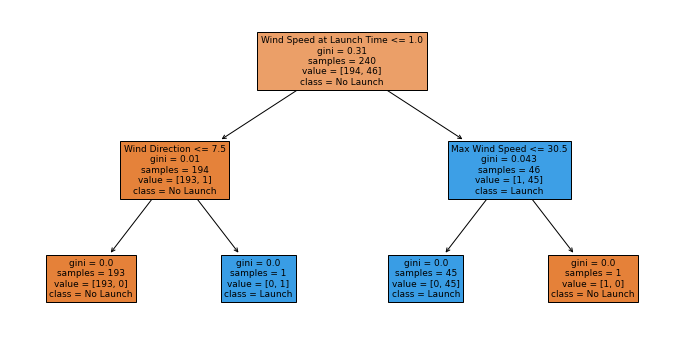

In [19]:
# plot tree
plt.figure(figsize=(12,6))  # set plot size 
tree.plot_tree(tree_model, feature_names = X.columns.values, class_names= ['No Launch','Launch'], filled = True)

Overall, when we look at the dataset, we have 240 samples:

* 194 are no launches
* 46 are launches

This simple tree shows you that the most important feature of the data was <code>Wind Speed at Launch Time</code>. If the wind speed was less than 1.0, then 194 of the 240 samples were correctly guessed to be no launch. We see that 194 of those samples only needed the <code>Wind Speed at Launch Time</code> value to be less than 1.0 to correctly guess the outcome, while above 1.0 required more information.

This insight isn't good. We previously set all values that were empty to 0. We also know that many of the values that were related to the time of launch were 0 because 60% of our data wasn't related to an actual launch or attempted launch.

As you continue to look at the tree, you can see that <code>Max Wind Speed</code> is the next most important feature of the data. Here, you can see that of the remaining 46 days when the max wind speed was less than 30.5, 45 of the days yielded a correct launch output and one of them yielded a no-launch output.

This data might be more interesting with some real-world context. There was only one day where a launch was planned and the <code>Max Wind Speed</code> value was greater than 30.5, which was May 27, 2020. The Space X Dragon launch was then postponed to May 30, 2020. Here's the evidence:

In [20]:
launch_data[(launch_data['Wind Speed at Launch Time'] > 1) & (launch_data['Max Wind Speed'] > 30.5)]

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
292,Space X Dragon,2020-05-27,16:33:00,Cape Canaveral,0,N,86.0,70.0,75.02,74.0,...,32.0,10.0,25.0,0.0,0.0,29.98,0.0,13:44:00,2,0


With this visualization, you could see that some features became important. But this emphasis was based on incorrect information. One improvement that could be made is to determine the relationship between <code>Max Wind Speed</code> and <code>Wind Speed at Launch Time</code> for the rows that have that information. Then, instead of making <code>Wind Speed at Launch Time</code> 0 for non-launch days, it could have been made to be the estimate of what it would be at a common launch time. This change might have represented the data better.

In [21]:
# ['Crewed or Uncrewed', 'High Temp', 'Low Temp', 'Ave Temp',
#        'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp',
#        'Hist Ave Temp', 'Precipitation at Launch Time',
#        'Hist Ave Precipitation', 'Wind Direction', 'Max Wind Speed',
#        'Visibility', 'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
#        'Hist Ave Visibility', 'Condition']

data_input = [ 1.  , 75.  , 68.  , 71.  ,  0.  , 75.  , 55.  , 65.  ,  0.  , 0.08,  0.  , 10.  , 15.  ,  0.  ,  0. ]

tree_model.predict([data_input])

array(['N'], dtype=object)